In [1]:
!pip install emnist

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Flatten, Dropout
from keras.utils import to_categorical
import emnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
images_balanced, labels_balanced = emnist.extract_training_samples('balanced')

In [4]:
print("ByClass Split - Images:", images_balanced.shape, "Labels:", labels_balanced.shape)

ByClass Split - Images: (112800, 28, 28) Labels: (112800,)


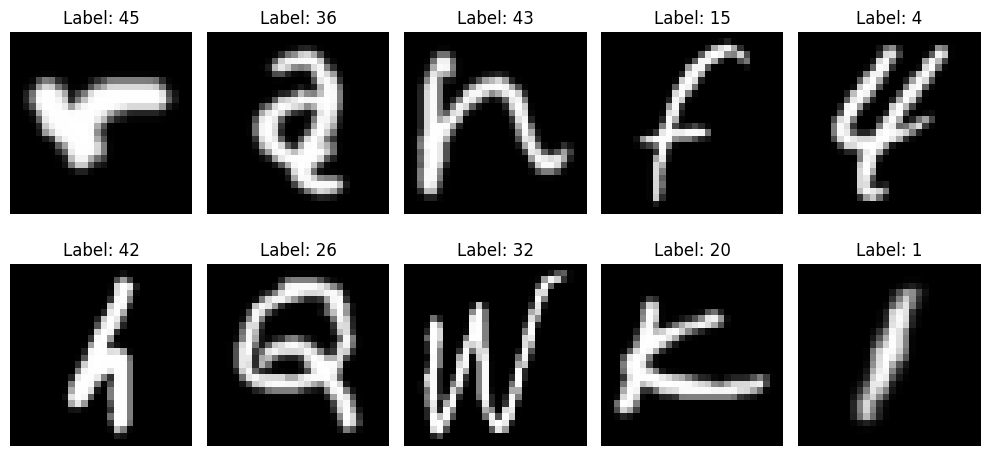

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images_balanced[i], cmap='gray')
    plt.title(f'Label: {labels_balanced[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
def dataPreprocess(images,labels):
    
    #splitting the dataset
    x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42)
    
    print(f"There are {len(np.unique(y_train))} output values")
    print(f"X_train Shape: {x_train.shape} ,, X_test shape : {x_test.shape}")
    
    #converting into categorical form
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    #reshaping the training images
    x_train = x_train.reshape((x_train.shape[0],28, 28, 1))
    x_test = x_test.reshape((x_test.shape[0],28,28,1))
    
    #normalizing
    x_train, x_test = x_train / 255.0, x_test / 255.0
    
    return x_train,x_test,y_train,y_test

In [7]:
x_train,x_test,y_train,y_test = dataPreprocess(images_balanced,labels_balanced)

There are 47 output values
X_train Shape: (90240, 28, 28) ,, X_test shape : (22560, 28, 28)


In [8]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3), padding="valid",activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 2 , padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3), padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 1 , padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3), padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides = 1 , padding='valid'))

model.add(Flatten())

model.add(Dense(216,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(47,activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 64)        256       
 chNormalization)                                                
                                                        

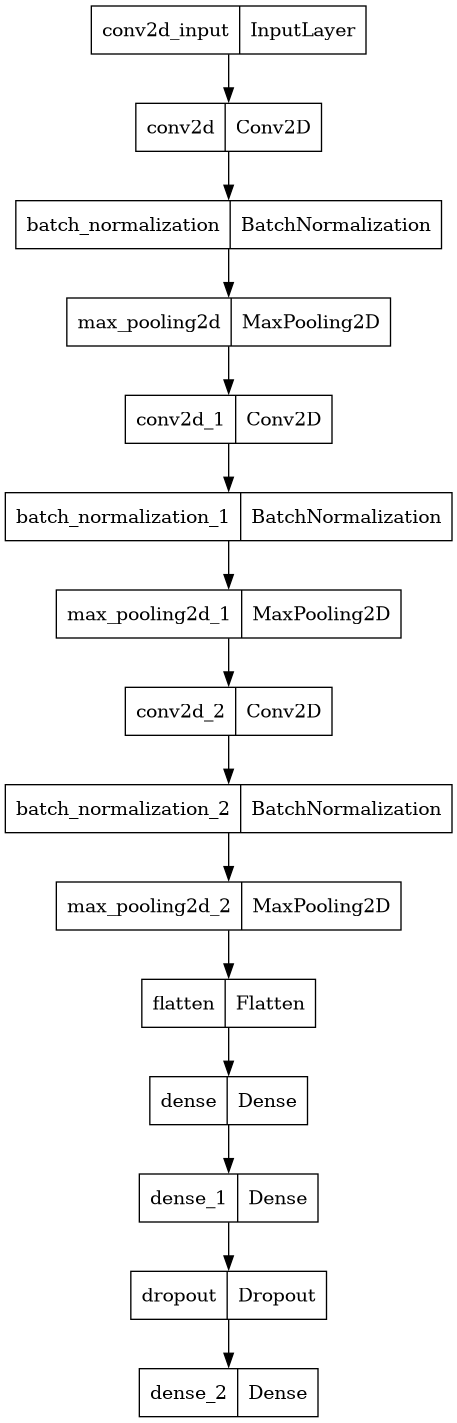

In [10]:
from keras.utils import plot_model
plot_model(model)

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(x_train,y_train, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
2820/2820 [==============================] - 19s 5ms/step - loss: 1.0031 - accuracy: 0.7036 - val_loss: 0.4507 - val_accuracy: 0.8387
Epoch 2/10
2820/2820 [==============================] - 13s 5ms/step - loss: 0.5609 - accuracy: 0.8216 - val_loss: 0.4096 - val_accuracy: 0.8591
Epoch 3/10
2820/2820 [==============================] - 13s 5ms/step - loss: 0.4823 - accuracy: 0.8450 - val_loss: 0.3743 - val_accuracy: 0.8734
Epoch 4/10
2820/2820 [==============================] - 13s 5ms/step - loss: 0.4359 - accuracy: 0.8555 - val_loss: 0.3778 - val_accuracy: 0.8730
Epoch 5/10
2820/2820 [==============================] - 13s 5ms/step - loss: 0.4037 - accuracy: 0.8650 - val_loss: 0.3628 - val_accuracy: 0.8766
Epoch 6/10
2820/2820 [==============================] - 13s 5ms/step - loss: 0.3767 - accuracy: 0.8715 - val_loss: 0.3672 - val_accuracy: 0.8785
Epoch 7/10
2820/2820 [==============================] - 13s 5ms/step - loss: 0.3597 - accuracy: 0.8760 - val_loss: 0.3700 - val_ac

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

705/705 [==============================] - 2s 3ms/step - loss: 0.3557 - accuracy: 0.8881
Test accuracy: 0.8881205916404724


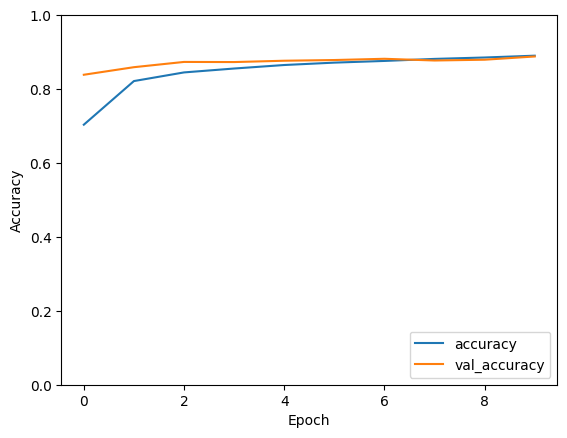

In [14]:
import matplotlib.pyplot as plt
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [15]:
model.save('my_model.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 201ms/step


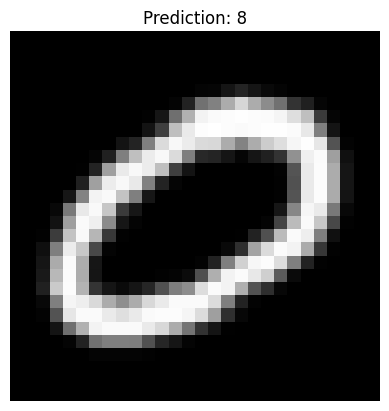

In [16]:
arr = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "a", "b", "d", "e", "f", "g", "h", "n", "q", "r", "t"]

import numpy as np
from tensorflow.keras.preprocessing import image

# Change the index to use a different image for prediction
image_index = 8
img = x_train[image_index]
img = np.expand_dims(img, axis=0)  # Add batch dimension
img = img.reshape((1, 28, 28, 1))  # Reshape to match model input shape

# Make prediction
prediction = model.predict(img)
predicted_label = np.argmax(prediction)

plt.imshow(x_train[image_index], cmap="gray")
plt.title(f"Prediction: {arr[predicted_label]}")
plt.axis('off')
plt.show()